In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Challenge: Model Comparison
## Thinkful Unit 3, Lesson 1

You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [2]:
data = pd.read_csv('onp.csv')

In [3]:
data = data.rename(columns=lambda x: x.strip())

In [4]:
def share_fun(row):
    if row['shares'] > 1400:
        return 1
    if row['shares'] <= 1400:
        return 0


data['shares_binary'] = data.apply(lambda row: share_fun(row), axis=1)
data['shares_rate'] = data['shares']/data['timedelta']

In [5]:
data = data.drop(['url', 'n_non_stop_words', 'n_non_stop_unique_tokens','kw_max_max', 'kw_avg_max', 'kw_min_avg'], 1)

In [8]:
data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_binary,shares_rate
0,731.000,12.000,219.000,0.664,4.000,2.000,1.000,0.000,4.680,5.000,...,-0.350,-0.600,-0.200,0.500,-0.188,0.000,0.188,593,0,0.811
1,731.000,9.000,255.000,0.605,3.000,1.000,1.000,0.000,4.914,4.000,...,-0.119,-0.125,-0.100,0.000,0.000,0.500,0.000,711,0,0.973
2,731.000,9.000,211.000,0.575,3.000,1.000,1.000,0.000,4.393,6.000,...,-0.467,-0.800,-0.133,0.000,0.000,0.500,0.000,1500,1,2.052
3,731.000,9.000,531.000,0.504,9.000,0.000,1.000,0.000,4.405,7.000,...,-0.370,-0.600,-0.167,0.000,0.000,0.500,0.000,1200,0,1.642
4,731.000,13.000,1072.000,0.416,19.000,19.000,20.000,0.000,4.683,7.000,...,-0.220,-0.500,-0.050,0.455,0.136,0.045,0.136,505,0,0.691


In [8]:
features=data.columns[7:54]

# OLS Regression

In [10]:
regr = linear_model.LinearRegression()
X = data[features]
Y = data['shares_rate']

In [18]:
regr.fit(X,Y)

Y_pred = regr.predict(X)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


pls1 = PLSRegression(n_components=7)
pls1.fit(X, Y)

Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, Y))


Coefficients: 
 [-2.54180515e-01 -4.28620751e+00  2.77300331e-01 -5.62008373e+00
 -7.75097775e+00 -3.27500877e+00 -4.45398151e+00 -2.78218766e+00
  5.15589956e+00 -3.42364570e-02  2.23275234e-03 -1.51480011e-02
 -1.39296726e-05 -1.22938286e-03  1.00220881e-02  6.77733366e-05
 -2.63254964e-06 -1.48921402e-05  3.18415003e+00  3.66340052e-01
 -1.80984408e+00 -2.11552663e+00 -1.25076792e+00  6.40119546e-01
  9.85529003e-01  1.62564855e+00  4.99078062e+00  1.06715864e+01
 -2.12308057e+00  1.15717868e+01  5.91490617e+00  1.06136656e+01
  3.83782022e+00 -1.34615404e+02 -1.71254179e+02 -2.93395516e+01
 -2.26647301e+01 -1.95961250e+01 -8.33154546e+00  5.70195801e+00
 -3.52344318e+00 -5.70107017e+00  4.47908578e+00 -3.03475028e+00
  1.72638551e+00 -1.13408270e+00  2.79349898e+00]

Intercept: 
 43.004215039672665

R-squared:
0.030492766099896044
R-squared PLSR: 0.02974389748580619


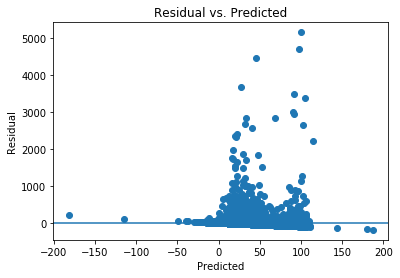

In [12]:
# Extract predicted values.
predicted = regr.predict(X)
actual = Y

# Calculate the error, also called the residual.
residual = actual - predicted

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [7]:
correlation_matrix = X.corr()
display(correlation_matrix)

NameError: name 'X' is not defined

In [14]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
print('With 25% Holdout: ' + str(regr.fit(X_train, Y_train).score(X_test, Y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))


With 25% Holdout: 0.03337229796871377
Testing on Sample: 0.030492766099896044


# KNN Regression

In [15]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


knn.fit(X_test, Y_test)
knn.score(X_test, Y_test)

0.22771154923773473

In [16]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=10)
print(score)

[-2.05921938 -3.28022344 -2.13205027 -5.10400743 -0.64697581 -0.66795604
 -1.02445076 -1.71539797 -0.58185422 -0.09548842]


# Reflection on Model Comparison

I was able to get better predictions from the KNN Regression model. However, I wasn't able to get very good predictions from either model. The dataset I chose came with many features. I attempted to reduce the features using PLSR, but that didn't help me to understand which features to keep and which to remove. 

I know that I need to transform my values in order to create better models, but I'm not exactly sure how to do that with the amount of features I am working with.